### Homework 3

General imports and statements

In [103]:
import itertools
import matplotlib, matplotlib.pyplot as plt
import numpy as np

# General plotting formatting
marker = itertools.cycle(('o', 's', '^', '*')) 

**Problem 1d:** Use both schemes to calculate the second derivative of sin 5𝑥 at 𝑥 = 1.5. (5 pts) Plot the absolute values of the errors as a function of h on a log-log plot. (5 pts) Use 10e−4 ≤ ℎ ≤ 10e0. Discuss your plot (5 pts)

In [40]:
def cdf_a(ys, h):
    ''' Derived 2nd derivative operator. '''
    if len(ys) != 5:
        return None
    else:
        return (ys[4] - 2*ys[2] + ys[0])/(4*h**2)
    
def cdf_b(ys, h):
    ''' Popular 2nd derivative operator. '''
    if len(ys) != 3:
        return None
    else:
        return (ys[2] - 2*ys[1] + ys[0])/(h**2)

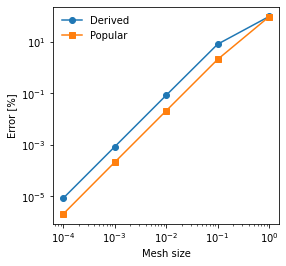

In [50]:
# Point of interest
point_x = 1.5
# Intervals around point of interest
width_x = 2
# Initialize list of grid spacing values
arr_h = [10**-4, 10**-3, 10**-2, 10**-1, 10**0]
# Actual value
actual = -25*np.sin(5*point_x)
# Initialize error dictionary
errors = {'Derived': [], 'Popular': []}
# Iterate through spacing values
for h_value in arr_h:
    # Initialize list of x-values. 
    # Note that number of values is equal to twice the maximum number of positions on 
    ### either side of the 'n' subscript value, plus 1 to account for this value.
    arr_x = np.linspace(point_x - h_value*width_x, point_x + h_value*width_x, 2*width_x+1)
    # Initialize list of y-values
    arr_y = [np.sin(5*i) for i in arr_x]
    # Get derivatives
    a, b = cdf_a(arr_y, h_value), cdf_b(arr_y[1:-1], h_value)
    # Calculate errors
    err_a, err_b = 100*abs((a - actual)/actual), 100*abs((b - actual)/actual)
    # Append to respective dictionaries
    errors['Derived'].append(err_a)
    errors['Popular'].append(err_b)

# Plot errors
fig, ax = plt.subplots()
for key, value in errors.items():
    im = ax.loglog(arr_h, value, marker = next(marker), label=key)
ax.set_xlabel('Mesh size')
ax.set_ylabel('Error [%]')
ax.set_aspect(0.5)
ax.legend(frameon=False);

**Problem 2c**: Calculate the approximation for f'(0.8) using the formula derived in part (a) with
step sizes h = 0.1, 0.05, 0.025, 0.0125, and log-log plot the error. (10 pts)

In [104]:
def backward(ys, h):
    ''' 3rd-order backward difference method. '''
    if len(ys) != 4:
        return None
    else:
        return (2*ys[3] + 3*ys[2] - 6*ys[1] + ys[0])/(6*h)
    
def central(ys, h):
    ''' 4th-order central difference method. '''
    if len(ys) != 5:
        return None
    else:
        return (-ys[4] + 8*ys[3] - 8*ys[1] + ys[0])/(12*h)

h: 0.0125 | 3rd-order: 5.9757 | 4th-order: 5.9757 | Errors: 0.001%, 0.000%
h: 0.0250 | 3rd-order: 5.9762 | 4th-order: 5.9755 | Errors: 0.008%, 0.002%
h: 0.0500 | 3rd-order: 5.9787 | 4th-order: 5.9737 | Errors: 0.050%, 0.032%
h: 0.1000 | 3rd-order: 5.9836 | 4th-order: 5.9460 | Errors: 0.133%, 0.496%


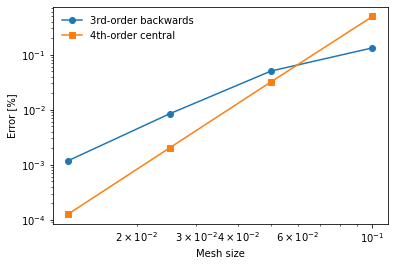

In [118]:
# Point of interest
point_x = 0.8
# Intervals around point of interest
width_x = 2
# Initialize list of grid spacing values
arr_h = [0.0125, 0.025, 0.05, 0.1]
# Actual value
actual = -2*np.pi*np.sin(2*np.pi*point_x)
# Initialize error dictionary
errors = {'3rd-order backwards': [], '4th-order central': []}
# Iterate through spacing values
for h_value in arr_h:
    # Initialize list of x-values
    # Note that number of values is equal to twice the maximum number of positions on 
    ### either side of the 'n' subscript value, plus 1 to account for this value.
    arr_x = np.linspace(point_x - h_value*width_x, point_x + h_value*width_x, 2*width_x+1)
    # Initialize list of y-values
    arr_y = [np.cos(2*np.pi*i) for i in arr_x]
    # Get derivatives
    a, b = backward(arr_y[:-1], h_value), central(arr_y, h_value)
    # Calculate errors
    err_a, err_b = 100*abs((a - actual)/actual), 100*abs((b - actual)/actual)
    # Print answers
    print('h: {0:.4f} | 3rd-order: {1:.4f} | 4th-order: {2:.4f} | Errors: {3:.3f}%, {4:.3f}%'.format(h_value, a, b, err_a, err_b))
    # Append to respective dictionaries
    errors['3rd-order backwards'].append(err_a)
    errors['4th-order central'].append(err_b)

# Plot errors
fig, ax = plt.subplots()
for key, value in errors.items():
    ax.loglog(arr_h, value, marker = next(marker), label=key)
ax.set_xlabel('Mesh size')
ax.set_ylabel('Error [%]')
ax.legend(frameon=False);